In [ ]:
from importlib import reload
import objets as o 


In [3]:
reload(o)
nx = 20
dt = 1/(nx**2)/2
t_end = 5
mu = 4
V = zeros((int(t_end/dt)+3,nx,nx,2))
V[:,:,:,0] = 1
fps = 100
ORDRE = 4
ANIM = 1

pol_ini = o.initial_conditions_2D(nx)

grille = o.Grid(nx,nx,dx=10/nx,dy=10/nx)
for i in range(nx) : 
    for j in range(nx) : 
        grille.set_pol(array([pol_ini[i,j]]),x=i,y=j)


TypeError: array_to_func() missing 2 required positional arguments: 't_end' and 'dt'

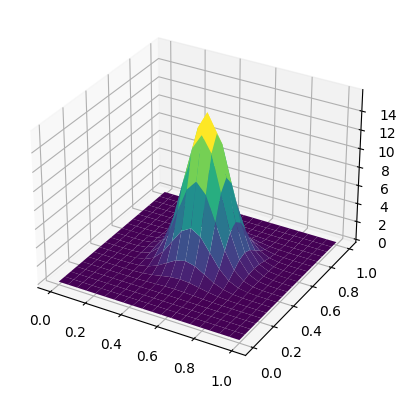

In [ ]:
X = linspace(0,1,nx)
Y = X 
X,Y = meshgrid(X,Y)
fig, ax = subplots(subplot_kw={"projection": "3d"})
ax.plot_surface(X,Y,grille.get_pol(),cmap="viridis")
show()

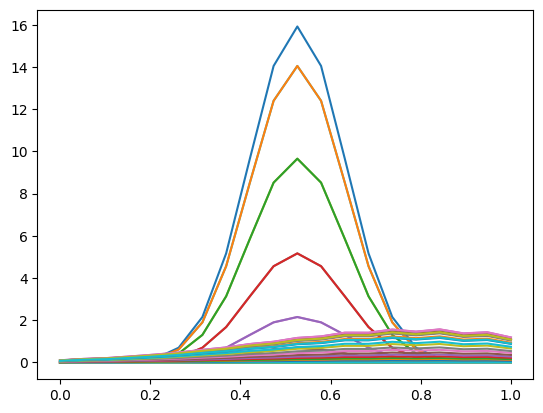

In [ ]:
reload(o)
res = o.solver(grille,dt,t_end,mu,V,ORDRE).solve()
plot(linspace(0,1,grille.nx),res[0])
plot(linspace(0,1,grille.nx),res[-5])
show()


Creating animation:   0%|          | 0/4002 [00:00<?, ?it/s]

Creating animation: 4004it [20:45,  3.21it/s]                              


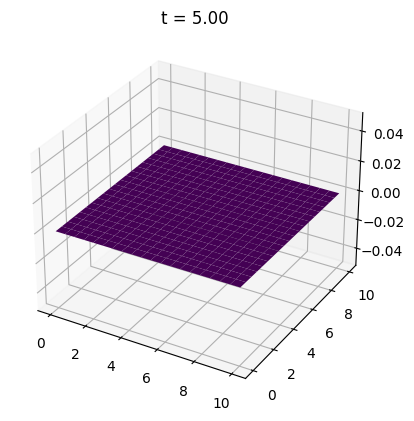

In [ ]:
reload(o)
# plot(linspace(0,1,test.nx),abs(res[-5]-res[0]))
# show()
T = linspace(0,t_end,len(res))
if ANIM :
    o.anim_surface(res,grille,fps=fps,name=f"nx{nx}-mu{mu}-V{V.max()}-order{ORDRE}.mp4",T=T)